# RANDOM FORES PARA DETERMINAR DIABETES
# FUENTE [KAGGLE](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv)

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [3]:
path = kagglehub.dataset_download("kumargh/pimaindiansdiabetescsv")
file = '/pima-indians-diabetes.csv'

path_file = path + file

print("Path to dataset files:", path_file)

df_diabetes = pd.read_csv(path_file,header=None)
df_diabetes.head(5)

100%|██████████| 8.89k/8.89k [00:00<00:00, 11.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kumargh/pimaindiansdiabetescsv/versions/1/pima-indians-diabetes.csv


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
df_diabetes.columns = columns
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df_diabetes.isna().sum().sum()

0

# ENTRENAMIENTO DE MODELO

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
X = df_diabetes.drop(columns=['Class'])

In [8]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y = df_diabetes['Class']
y

,Class
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [10]:
df_diabetes.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Class,int64


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [14]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Definir los rangos de hiperparámetros
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Categorical(['sqrt', 'log2'])
}

# Instancia del modelo
rf = RandomForestClassifier(random_state=42)

# Optimización bayesiana
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space,
                             n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Entrenar con los datos
bayes_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", bayes_search.best_params_)
print("Mejor puntuación:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [23]:
model = RandomForestClassifier(max_depth=32,max_features='log2',min_samples_leaf=5,min_samples_split=17,n_estimators=131,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=32, max_features='log2', min_samples_leaf=5,
                       min_samples_split=17, n_estimators=131, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El accuracy en train es : {train_accuracy}')
print(f'El accuracy en test est : {test_accuracy}')

El accuracy en train es : 0.8876221498371335
El accuracy en test est : 0.7662337662337663


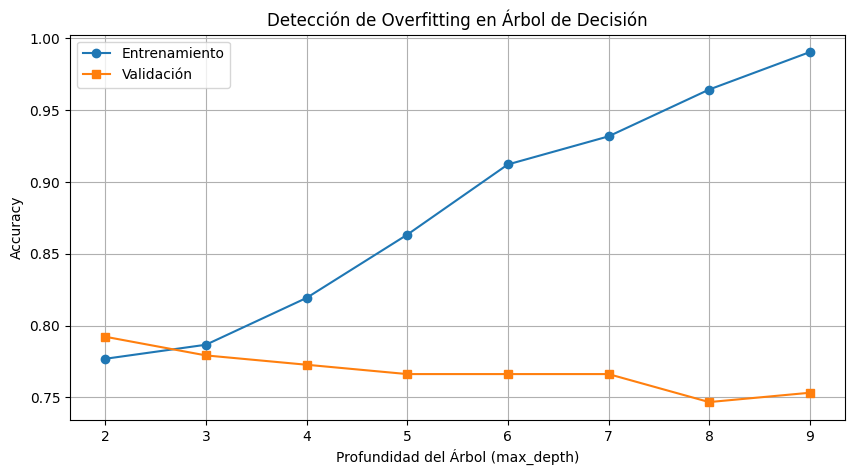

In [25]:

train_scores = []
val_scores = []
max_depths = range(2,10)  # Profundidades

for depth in max_depths:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_test, model.predict(X_test))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

# GRAFICAMOS LAS VARIABLES MAS IMPORTANTES

In [18]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
feature_importances_df = pd.DataFrame({"feature": features,"importance": model.feature_importances_}).sort_values("importance",ascending=False)
feature_importances_df

,feature,importance
1,Glucose,0.258864
5,BMI,0.169984
7,Age,0.140931
6,DiabetesPedigreeFunction,0.123768
2,BloodPressure,0.088134
0,Pregnancies,0.076551
4,Insulin,0.076122
3,SkinThickness,0.065646


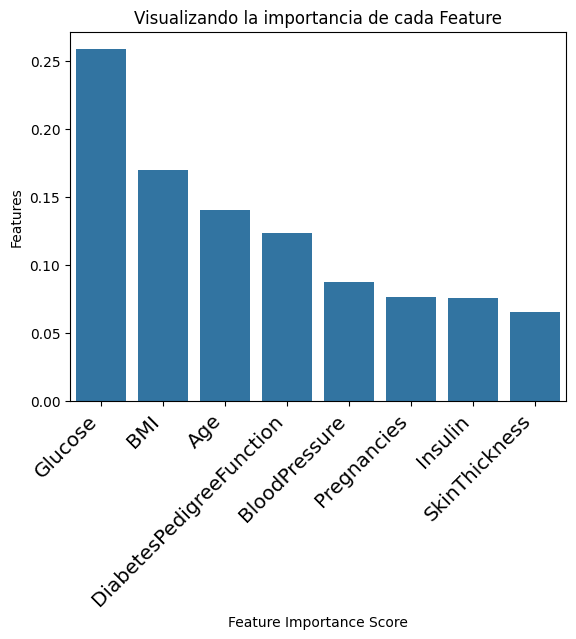

In [19]:
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45,horizontalalignment ="right",fontweight="light",fontsize="x-large")
plt.show()